In [1]:
# Import cognitive atlas & relevent libraries
from cognitiveatlas.api import search, get_disorder, get_concept, get_task
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import collections

In [3]:
# Goal number one was to look at all the weird fake entries under disorders
# Getting the list for "is_a_protocol"—the field that indicates the fake entries
# first attempt at filtering those
disorder_id_prots = [disorder["is_a_protocol"] for disorder in get_disorder().json]

http://cognitiveatlas.org/api/v-alpha/disorder?
Result Includes:<pandas:data frame><json:dict><txt:str><url:str>


In [4]:
# turning that list into a boolean for whether or not it's a real entry
# i didn't wind up doing the filtering this way, but whatever

doid_ind = []

for id_prot in disorder_id_prots:
    doid_ind.append(id_prot=="DOID")

In [5]:
disorders = get_disorder().pandas

# collecting all the definitions for the fake disorders
# this was made a bit awkward because "def" is both  the name of 
# one of the fields in the set of disorders, and also a keyword in python
# 

disorder_bads_descriptions = [disorders["def"][ind] for ind in range(0,219) if disorders.is_a_protocol[ind]!="DOID"]
disorder_bads_names = [disorders.name[ind] for ind in range(0,219) if disorders.is_a_protocol[ind]!="DOID"]

http://cognitiveatlas.org/api/v-alpha/disorder?
Result Includes:<pandas:data frame><json:dict><txt:str><url:str>


In [6]:
# make a dictionary with the names & defs of all the fake entries
bad_entries = {disorder_bads_names[ind]: disorder_bads_descriptions[ind] for ind in range(0,5)}
bad_entries

{'Flapjacks': 'Did I add this?',
 'Letter position dyslexia': 'Letter position dyslexia is a type of reading disorder that results from an impairment in the encoding of letter positions within the word. It can be developmental or acquired. The main characteristic of this dyslexia is letter transpositions within the word (reading from as "form", parties as "pirates). ',
 'Wingnut': 'Vivamus vitae mollis justo. Sed auctor porta pretium. Cras ac consectetur sem. Phasellus nec ligula eu turpis adipiscing rhoncus mattis eget lacus. Cras posuere dictum aliquam. Vivamus tincidunt odio sed diam dictum tincidunt. Ut ante orci, vestibulum ac congue id, molestie eu mi. Phasellus fermentum dolor velit, vel tristique erat pulvinar eu.\r\n\r\nQuisque sodales mi ac auctor egestas. Nulla ullamcorper eu purus ultrices volutpat. Fusce condimentum, nisl a laoreet tempus, lacus massa mattis dolor, vel consectetur erat nulla non sem. Suspendisse ultrices ut turpis eget malesuada. Pellentesque habitant morb

In [7]:
# get all the concepts
concepts = get_concept().pandas

http://cognitiveatlas.org/api/v-alpha/concept?
Result Includes:<pandas:data frame><json:dict><txt:str><url:str>


In [8]:
# get all the concept names that have no connections & also the concepts that have connections

# this was a bit weird, and there was probably a better way to do this
# but the gist is that the relationships field contains a list if 
# there are relationships and it contains NaN if there are not.
# NaN is a float, so I couldn't perform the same operation across 
# the whole column.
# 
empty_relat = [concepts.name[ind] for ind in range(0,802) if isinstance(concepts.relationships[ind],float)]
has_relat = [concepts.name[ind] for ind in range(0,802) if isinstance(concepts.relationships[ind],list)]
 

# the collection of relationships
relats = [concepts.relationships[ind] for ind in range(1,803) if isinstance(concepts.relationships[ind],list)]

317
485


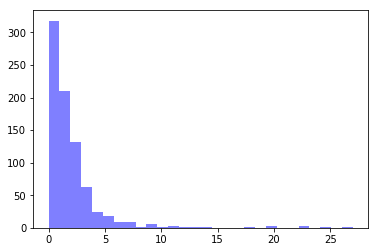

In [9]:
print(len(empty_relat))
print(len(has_relat))
relat_lens = [len(item) for item in relats]


# given the type-whatthefuckery above, I just added zeros for each of the NaNs
# so I could make a histogram of the lengths, including the empty ones
# there's probably a more elegant way to do this but ¯\_(ツ)_/¯

forhist = np.array(relat_lens)
forhist2 = np.zeros(318, dtype=np.int)
all_relat_lens = np.append(forhist,forhist2)


num_bins = 28
n, bins, patches = plt.hist(all_relat_lens, num_bins, facecolor='blue', alpha=0.5)
plt.show()



In [10]:
# This is the percent of the concept terms that have 3 or more connections
print(144/803)

more_than_two = [relat_lens[ind] for ind in range(0,484) if relat_lens[ind]>2]
less_than_two = [relat_lens[ind] for ind in range(0,484) if relat_lens[ind]<=2]
print(len(more_than_two))
print(len(less_than_two))
sum(more_than_two)

0.1793275217932752
143
341


789

In [11]:
# hmm let's check out tasks
tasks = get_task().pandas


http://cognitiveatlas.org/api/v-alpha/task?
Result Includes:<pandas:data frame><json:dict><txt:str><url:str>


In [12]:
# i thought to myself, gee i'll just do the same thing again with
# the tasks to find out how those are all connected.
# turns out, tasks don't have "relationships" because whoever made
# this website doesn't go for that kind of consistency i guess.

tasks = get_task().pandas
# empty_relat_task = [tasks.name[ind] for ind in range(0,739) if isinstance(tasks.relationships[ind],float)]
# has_relat_task = [tasks.name[ind] for ind in range(0,739) if isinstance(tasks.relationships[ind],list)]
tasks.loc[1]

http://cognitiveatlas.org/api/v-alpha/task?
Result Includes:<pandas:data frame><json:dict><txt:str><url:str>


alias                                         two-stage decision task
concept_class                                                        
def_event_stamp                                   2015-12-08 21:01:54
def_id                                              def_56674542a3c51
def_id_user                                         usr_566738e285cfc
definition_text     Subjects participate in a two-stage decision t...
event_stamp                                       2015-12-08 21:01:13
id                                                  trm_5667451917a34
id_concept_class                                                     
id_user                                             usr_566738e285cfc
name                                            2-stage decision task
type                                                             task
Name: 1, dtype: object

In [20]:
concepts.loc[1]

alias                                                                
concept_class                                                        
def_event_stamp                                   2012-03-28 15:36:11
def_id                                              def_4f732feb3ba80
def_id_user                                         usr_49a467bf4e0db
definition_text     high-level analogy that retains general inform...
event_stamp                                       2009-06-22 19:12:54
id                                                  trm_4a3fd79d096e3
id_concept_class                                               ctp_C3
id_user                                                usr_0000000000
name                                                 abstract analogy
relationships       [{'relationship': 'kind of', 'id': 'trm_4a3fd7...
type                                                          concept
Name: 1, dtype: object

In [14]:
# oookay, well scratching that.

# i also checked out the number of contributors to cognitive atlas in the
# same fun, haphazard, can-you-tell-i've-never-used-python-before manner
len(pd.unique(concepts.def_id_user))

# it honestly isn't entirely clear what the difference is between the 
# "def_id_user" and the "id_user" fields. they use the same strings 
# to refer to users, so I just counted these all together
#
# also, why doesn't disorders have a def_id_user field???
#

all_users = [concepts.id_user, concepts.def_id_user, 
           tasks.id_user, tasks.def_id_user,
           disorders.id_user]
all_users = pd.concat(all_users)

# number of contributors
print(len(pd.unique(all_users)))
userlist = list(all_users)
    
# make a dictionary of (users:number of contributions)
user_contribs = dict((x,userlist.count(x)) for x in set(userlist))

74


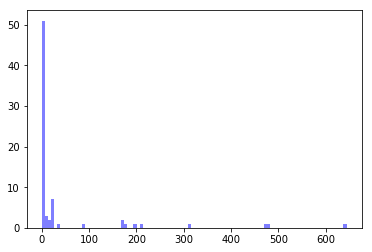

In [15]:
# histogram of contributions per user
user_contrib_list = list(user_contribs.values())

num_bins = 100
n, bins, patches = plt.hist(user_contrib_list, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [16]:
# let's figure out contributions by year
type(concepts.event_stamp[1])

# okay, i just want to acknowledge that i know there has to be a cleaner way
# to loop over all the items. like. i know.
# i mean, hell, there is probably a better way to do most of this.
# but i've only been using python for a week so this is what I'm going with.
# i just have to believe that no person will ever look at this code.
# y'know?
# lowkey i honestly think the person who set up this api had a similar philosophy.


concept_years = [concepts.event_stamp[ind][:4] for ind in range(0,802)]
task_years = [tasks.event_stamp[ind][:4] for ind in range(0,739)]
disorder_years = [disorders.event_stamp[ind][:4] for ind in range(0,219)]

years = concept_years+task_years+disorder_years
set(years)

{'2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'}

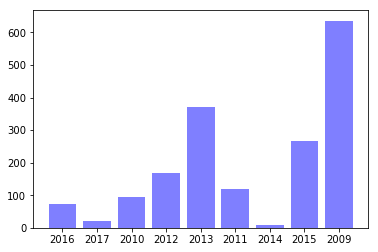

In [17]:
# plot contributions by year
year_freqs = dict((int(x),years.count(x)) for x in set(years))

plt.bar(range(len(year_freqs)), year_freqs.values(), align='center', facecolor = 'blue', alpha = 0.5)
plt.xticks(range(len(year_freqs)), year_freqs.keys())

plt.show()


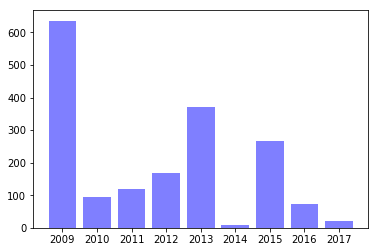

In [18]:
# well that was great, but now the years aren't in order?
# jfc, it seems like there has to be an easier ways to rearrange 
# the columns in a bar plot than bringing in a new data structure?
# but I don't know of one
# so OrderedDicts here we go

sorted_years = collections.OrderedDict(sorted(year_freqs.items(), key=lambda t: t[0]))


plt.bar(range(len(sorted_years)), sorted_years.values(), align='center', facecolor = 'blue', alpha = 0.5)
plt.xticks(range(len(sorted_years)), sorted_years.keys())

plt.show()

In [19]:
# well, i feel like we've all learned a lot here today, kids. thanks for dropping by